In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pip install torch

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Clg grp project/India wind speed potential with Actual data.csv')
df

,STATE,longitude,latitude,wind_speed (m/s),distance_to_seashore (km),elevation (m),temperature (C),humidity (%),air_density (kg/m^3),Unnamed: 9,Unnamed: 10
0,JAMMU AND KASHMIR,75.81577994,34.45674782,5.4057374,1339.35001,3798,21,65,1.12,NaN,NaN
1,JAMMU AND KASHMIR,76.79510838,33.47949654,4.9437666,1293.852416,4303,21,65,1.12,NaN,NaN
2,JAMMU AND KASHMIR,75.43966703,34.39144109,3.78182,1319.563054,4338,21,65,1.12,NaN,NaN
3,JAMMU AND KASHMIR,75.79357894,34.12263979,8.870201,1304.484655,5037,21,65,1.12,NaN,NaN
4,JAMMU AND KASHMIR,77.46023019,32.81930692,3.263829,1246.270083,4624,21,65,1.12,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4645,Muppandal Wind Farm,"Kanyakumari, Tamil Nadu",8.13,77.43,1500,7.494481426,77.99726017,40.6708965,20.5021353,62.82970263,1.235552788
4646,Suzlon Wind Farm,"Dhule, Maharashtra",20.9,74.77,1000,14.40857168,29.04180608,1455.16568,24.12726729,29.76457025,1.059902135
4647,Jaisalmer Wind Park,"Jaisalmer, Rajasthan",26.91,70.91,1064,11.7839273,433.0880729,1250.339535,30.74269295,40.4501254,1.154270332
4648,Bharati Wind Farm,"Satara, Maharashtra",17.69,74,500,10.18390181,300.5575059,326.3852749,27.95835056,45.64532903,1.177724371


In [ ]:
df = df.iloc[:-16,:-2]

In [ ]:
df

,STATE,longitude,latitude,wind_speed (m/s),distance_to_seashore (km),elevation (m),temperature (C),humidity (%),air_density (kg/m^3)
0,JAMMU AND KASHMIR,75.81577994,34.45674782,5.4057374,1339.35001,3798,21,65,1.12
1,JAMMU AND KASHMIR,76.79510838,33.47949654,4.9437666,1293.852416,4303,21,65,1.12
2,JAMMU AND KASHMIR,75.43966703,34.39144109,3.78182,1319.563054,4338,21,65,1.12
3,JAMMU AND KASHMIR,75.79357894,34.12263979,8.870201,1304.484655,5037,21,65,1.12
4,JAMMU AND KASHMIR,77.46023019,32.81930692,3.263829,1246.270083,4624,21,65,1.12
...,...,...,...,...,...,...,...,...,...
4629,LAKSHADWEEP,71.86429708,12.29734059,5.11248,84.29013703,0,21,65,1.12
4630,LAKSHADWEEP,71.83926853,12.34197675,5.153055,89.91373821,0,21,65,1.12
4631,LAKSHADWEEP,71.84540712,12.29036483,5.1284904,84.4702821,0,21,65,1.12
4632,LAKSHADWEEP,71.84329653,12.21084415,5.144048,76.77462704,0,21,65,1.12


In [ ]:
df.isnull().sum()

,0
STATE,0
longitude,0
latitude,0
wind_speed (m/s),0
distance_to_seashore (km),0
elevation (m),0
temperature (C),0
humidity (%),0
air_density (kg/m^3),0


In [ ]:
print(df.columns)

Index(['STATE', 'longitude', 'latitude', 'wind_speed (m/s)',
       'distance_to_seashore (km)', 'elevation (m)', 'temperature (C)',
       'humidity (%)', 'air_density (kg/m^3)'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
features = df[['longitude', 'latitude', 'distance_to_seashore (km)',
               'elevation (m)', 'temperature (C)', 'humidity (%)', 'air_density (kg/m^3)']]
target = df['wind_speed (m/s)']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train_scaled = X_train_scaled.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(
    X_train_scaled, y_train,
    epochs=80,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test MAE: {test_mae:.2f}")


Epoch 1/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5.8029 - mae: 1.9552 - val_loss: 1.1227 - val_mae: 0.8099
Epoch 2/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1042 - mae: 0.8008 - val_loss: 0.9024 - val_mae: 0.7329
Epoch 3/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8594 - mae: 0.7130 - val_loss: 0.8364 - val_mae: 0.6823
Epoch 4/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8224 - mae: 0.6760 - val_loss: 0.7411 - val_mae: 0.6457
Epoch 5/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6499 - mae: 0.6084 - val_loss: 0.6966 - val_mae: 0.6228
Epoch 6/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5727 - mae: 0.5663 - val_loss: 0.6689 - val_mae: 0.5992
Epoch 7/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5575 - mae: 0.5426 - val_loss: 0.7364 - val_mae: 0.6033
Epoch 8/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6094 - mae: 0.5451 - val_loss: 0.6187 - val_mae: 0.5544
Epoch 9/80
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Performance Metrics:
Mean Absolute Error (MAE): 0.45
Mean Squared Error (MSE): 0.49
Root Mean Squared Error (RMSE): 0.70
R² Score: 0.78


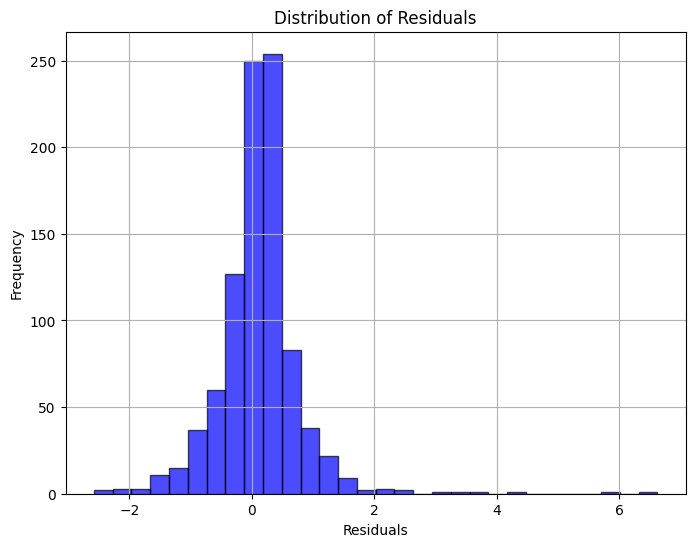

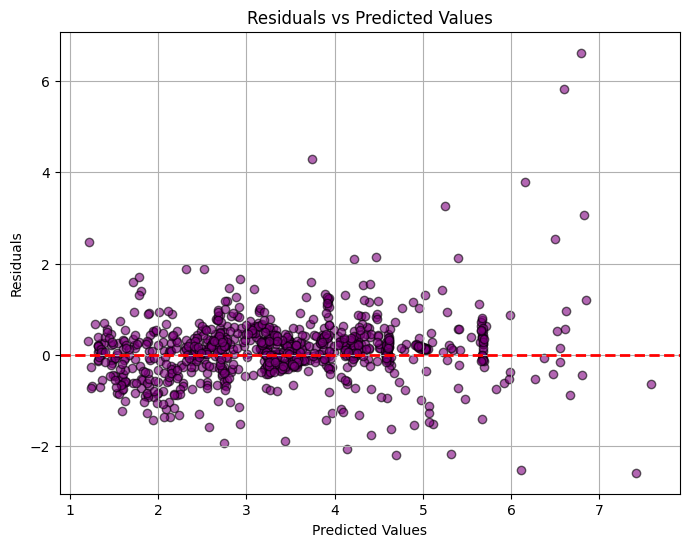


Baseline Comparison:
Model MAE: 0.45
Baseline MAE (Mean of Target): 1.12


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid()
plt.show()
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color='purple', edgecolors='k')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid()
plt.show()
baseline = np.mean(y_test)
baseline_mae = mean_absolute_error(y_test, [baseline] * len(y_test))
print("\nBaseline Comparison:")
print(f"Model MAE: {mae:.2f}")
print(f"Baseline MAE (Mean of Target): {baseline_mae:.2f}")
